In [2]:
def write_columns_to_txt(df, file_path):
    """
    Write column names of a DataFrame to a text file.

    Parameters:
    df (pandas.DataFrame): Input DataFrame.
    file_path (str): File path to save the column names.

    Returns:
    None
    """
    try:
        with open(file_path, 'w') as file:
            file.write('\n'.join(df.columns))
        print(f'Column names saved to {file_path}')
    except Exception as e:
        print(f'Error: {str(e)}')

In [3]:
import pickle
import pathlib

import numpy as np
import pandas as pd

In [4]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/Users/pedropertusi/Desktop/4o semestre/ML/ames/data


In [5]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [6]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

In [8]:
categorical_variables = ['MS.SubClass',
 'MS.Zoning',
 'Land.Contour',
 'Lot.Config',
 'Neighborhood',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Mas.Vnr.Type',
 'Foundation',
 'Central.Air',
 'Garage.Type',
 'Sale.Type',
 'Sale.Condition']



In [9]:
corr = data.corr(numeric_only=True)
corr

,Lot.Frontage,Lot.Area,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,...,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice,HasShed,HasAlley,Garage.Age,Remod.Age,House.Age
Lot.Frontage,1.000000,0.355328,0.200392,0.205371,0.042011,0.106536,0.336705,0.418892,0.029599,-0.001825,...,0.162721,0.034313,0.014470,-0.004747,0.344784,0.011320,-0.177767,-0.071120,-0.089459,-0.121554
Lot.Area,0.355328,1.000000,0.126555,0.200801,0.086703,0.023159,0.265581,0.325148,0.034176,0.001377,...,0.095011,0.069648,0.010495,-0.021921,0.267173,0.090580,-0.093665,0.001711,-0.026623,-0.030109
Mas.Vnr.Area,0.200392,0.126555,1.000000,0.299089,-0.016372,0.085895,0.390820,0.394105,0.119587,-0.057367,...,0.004278,0.044741,-0.001136,-0.016058,0.446062,-0.043707,-0.082080,-0.243484,-0.188297,-0.304256
BsmtFin.SF.1,0.205371,0.200801,0.299089,1.000000,-0.056870,-0.482020,0.533889,0.462239,-0.165270,-0.064834,...,0.084401,0.093445,-0.002841,0.026386,0.407297,-0.001750,-0.150033,-0.185608,-0.141578,-0.272546
BsmtFin.SF.2,0.042011,0.086703,-0.016372,-0.056870,1.000000,-0.239814,0.087399,0.084590,-0.100135,-0.004195,...,0.044452,-0.005305,-0.009417,0.009672,0.012289,0.013147,-0.043275,0.073384,0.066803,0.033595
Bsmt.Unf.SF,0.106536,0.023159,0.085895,-0.482020,-0.239814,1.000000,0.409612,0.301193,-0.000609,0.043669,...,-0.032724,-0.011220,0.026151,-0.040859,0.195797,-0.063055,0.042891,-0.168757,-0.167881,-0.132291
Total.Bsmt.SF,0.336705,0.265581,0.390820,0.533889,0.087399,0.409612,1.000000,0.815610,-0.211210,-0.025204,...,0.072119,0.083837,0.019646,-0.009829,0.624716,-0.060011,-0.129695,-0.333923,-0.289815,-0.403118
X1st.Flr.SF,0.418892,0.325148,0.394105,0.462239,0.084590,0.301193,0.815610,1.000000,-0.252629,-0.012653,...,0.123227,0.093944,0.043615,-0.010413,0.605974,-0.026975,-0.141416,-0.255724,-0.236839,-0.309767
X2nd.Flr.SF,0.029599,0.034176,0.119587,-0.165270,-0.100135,-0.000609,-0.211210,-0.252629,1.000000,0.021209,...,0.044640,-0.005129,0.014998,-0.018818,0.280400,-0.014918,0.106856,-0.090822,-0.158492,-0.018481
Low.Qual.Fin.SF,-0.001825,0.001377,-0.057367,-0.064834,-0.004195,0.043669,-0.025204,-0.012653,0.021209,1.000000,...,0.036080,-0.005848,0.006629,-0.005593,-0.042973,0.003850,0.067761,0.047639,0.062855,0.143611


<Axes: >

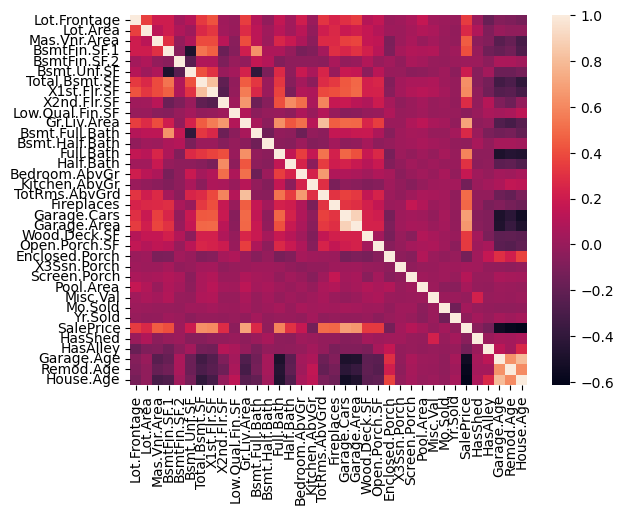

In [10]:
import seaborn as sns

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [11]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

In [13]:
from sklearn.feature_selection import mutual_info_regression

# calculates mutual_info_regression between the float64 columns and the target
mi = mutual_info_regression(X.select_dtypes(include=['float64']), y)

importances = sorted(list(zip(X.select_dtypes(include=['float64']).columns, mi)), key=lambda x: x[1], reverse=True)

importances

[('Gr.Liv.Area', 0.4991820020053064),
 ('Total.Bsmt.SF', 0.40264758153876645),
 ('Garage.Area', 0.3964590238285126),
 ('Garage.Cars', 0.39106887763187204),
 ('House.Age', 0.36986523542472316),
 ('X1st.Flr.SF', 0.3660292760067412),
 ('Garage.Age', 0.3023739363185163),
 ('Remod.Age', 0.2698050150561624),
 ('Full.Bath', 0.26603889309202566),
 ('Lot.Frontage', 0.23666063384373404),
 ('TotRms.AbvGrd', 0.20473812234765543),
 ('X2nd.Flr.SF', 0.20132661264571317),
 ('Fireplaces', 0.18016106857320313),
 ('Lot.Area', 0.177451576107714),
 ('Open.Porch.SF', 0.1755768165843703),
 ('BsmtFin.SF.1', 0.1752084647791743),
 ('Mas.Vnr.Area', 0.1663958540109962),
 ('Bsmt.Unf.SF', 0.10898575417718437),
 ('Wood.Deck.SF', 0.10487359108500138),
 ('Half.Bath', 0.06412780218299297),
 ('Bedroom.AbvGr', 0.05210690841376753),
 ('Enclosed.Porch', 0.04271846969990811),
 ('Bsmt.Full.Bath', 0.04218266859459674),
 ('Yr.Sold', 0.028935035767818196),
 ('Screen.Porch', 0.015371961413126911),
 ('Kitchen.AbvGr', 0.0143980908

In [14]:
# filter from X only importances above 0.15

for col, mi_score in importances:
    if mi_score < 0.15:
        X.drop(col, axis=1, inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MS.SubClass     2877 non-null   category
 1   MS.Zoning       2877 non-null   category
 2   Lot.Frontage    2877 non-null   float64 
 3   Lot.Area        2877 non-null   float64 
 4   Lot.Shape       2877 non-null   category
 5   Land.Contour    2877 non-null   category
 6   Lot.Config      2877 non-null   category
 7   Land.Slope      2877 non-null   category
 8   Neighborhood    2877 non-null   category
 9   Bldg.Type       2877 non-null   category
 10  House.Style     2877 non-null   category
 11  Overall.Qual    2877 non-null   category
 12  Overall.Cond    2877 non-null   category
 13  Roof.Style      2877 non-null   category
 14  Mas.Vnr.Type    2877 non-null   category
 15  Mas.Vnr.Area    2877 non-null   float64 
 16  Exter.Qual      2877 non-null   category
 17  Exter.Cond      287

<Axes: >

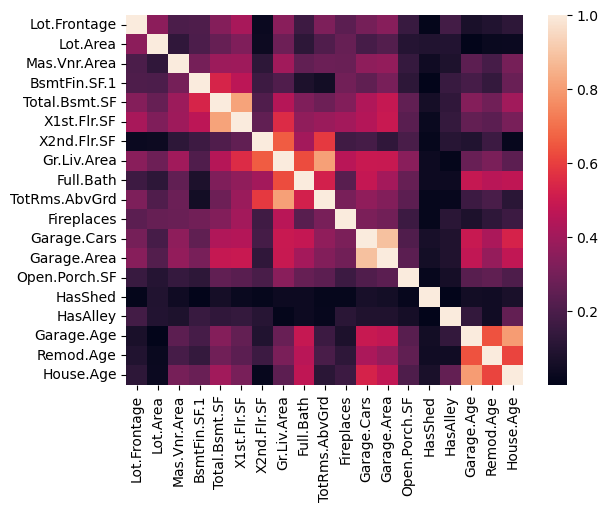

In [15]:
corr = X.corr(numeric_only=True)

sns.heatmap(corr.apply(abs), xticklabels=corr.columns, yticklabels=corr.columns)

In [16]:
corr = corr.apply(abs)
corr = corr[corr > 0.65]
corr = corr[corr < 1]

corr_dict = {}
for column in corr.columns:
    corr_dict[column] = corr[column][corr[column].notna()].index.tolist()
for key in list(corr_dict.keys()):
    if len(corr_dict[key]) == 0:
        del corr_dict[key]

corr_dict

{'Total.Bsmt.SF': ['X1st.Flr.SF'],
 'X1st.Flr.SF': ['Total.Bsmt.SF'],
 'X2nd.Flr.SF': ['Gr.Liv.Area'],
 'Gr.Liv.Area': ['X2nd.Flr.SF', 'TotRms.AbvGrd'],
 'TotRms.AbvGrd': ['Gr.Liv.Area'],
 'Garage.Cars': ['Garage.Area'],
 'Garage.Area': ['Garage.Cars'],
 'Garage.Age': ['House.Age'],
 'House.Age': ['Garage.Age']}

In [17]:
# Drop garage age

X.drop('Garage.Age', axis=1, inplace=True)

# Drop garage cars

X.drop('Garage.Cars', axis=1, inplace=True)

# Drop Total.Bsmt.SF

X.drop('Total.Bsmt.SF', axis=1, inplace=True)

In [18]:
# Function that creates a new feature from the ratio of the two features

def create_ratio_feature(df, feature1, feature2):
    new_feature = feature1 + '_' + feature2
    df[new_feature] = df[feature1] / df[feature2]
    df.drop(feature1, axis=1, inplace=True)
    df.drop(feature2, axis=1, inplace=True)
    return df

In [19]:
create_ratio_feature(X, 'TotRms.AbvGrd', 'Gr.Liv.Area')

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Fence,Sale.Type,Sale.Condition,Condition,HasShed,HasAlley,Exterior,Remod.Age,House.Age,TotRms.AbvGrd_Gr.Liv.Area
0,20,RL,141.0,31770.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,NoFence,GroupedWD,Normal,Norm,False,False,BrkFace,50.0,50.0,0.004227
1,20,RH,80.0,11622.0,Reg,Lvl,Inside,Gtl,NAmes,1Fam,...,MnPrv,GroupedWD,Normal,Roads,False,False,VinylSd,49.0,49.0,0.005580
2,20,RL,81.0,14267.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,NoFence,GroupedWD,Normal,Norm,False,False,Wd Sdng,52.0,52.0,0.004515
3,20,RL,93.0,11160.0,Reg,Lvl,Corner,Gtl,NAmes,1Fam,...,NoFence,GroupedWD,Normal,Norm,False,False,BrkFace,42.0,42.0,0.003791
4,60,RL,74.0,13830.0,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,MnPrv,GroupedWD,Normal,Norm,False,False,VinylSd,12.0,13.0,0.003683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937.0,IR1,Lvl,CulDSac,Gtl,Mitchel,1Fam,...,GdPrv,GroupedWD,Normal,Norm,False,False,HdBoard,22.0,22.0,0.005982
2926,20,RL,68.0,8885.0,IR1,Low,Inside,Mod,Mitchel,1Fam,...,MnPrv,GroupedWD,Normal,Norm,False,False,HdBoard,23.0,23.0,0.005543
2927,85,RL,62.0,10441.0,Reg,Lvl,Inside,Gtl,Mitchel,1Fam,...,MnPrv,GroupedWD,Normal,Norm,True,False,HdBoard,14.0,14.0,0.006186
2928,20,RL,77.0,10010.0,Reg,Lvl,Inside,Mod,Mitchel,1Fam,...,NoFence,GroupedWD,Normal,Norm,False,False,HdBoard,31.0,32.0,0.004320


In [20]:
#salvar as colunas em um txt 
x_for_api = X.copy()
write_columns_to_txt(x_for_api, "/Users/pedropertusi/Desktop/4o semestre/ML/ames/api/colunas.txt")
x_for_api.to_csv("/Users/pedropertusi/Desktop/4o semestre/ML/ames/api/old_data.csv", index=False)

Column names saved to /Users/pedropertusi/Desktop/4o semestre/ML/ames/api/colunas.txt


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   MS.SubClass                2877 non-null   category
 1   MS.Zoning                  2877 non-null   category
 2   Lot.Frontage               2877 non-null   float64 
 3   Lot.Area                   2877 non-null   float64 
 4   Lot.Shape                  2877 non-null   category
 5   Land.Contour               2877 non-null   category
 6   Lot.Config                 2877 non-null   category
 7   Land.Slope                 2877 non-null   category
 8   Neighborhood               2877 non-null   category
 9   Bldg.Type                  2877 non-null   category
 10  House.Style                2877 non-null   category
 11  Overall.Qual               2877 non-null   category
 12  Overall.Cond               2877 non-null   category
 13  Roof.Style                 2877 non-nu

In [22]:
# import pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# create pipeline for numeric features
pipe_num = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
])

trans = ColumnTransformer([
    ('pipe_num', pipe_num, X.select_dtypes(include=['float64']).columns),
])

# Model

In [23]:
RANDOM_SEED = 42

In [24]:
X_trans = pd.get_dummies(X, drop_first=True)
X_trans = trans.fit_transform(X_trans)

In [25]:
# train tet split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=.2, random_state=RANDOM_SEED)

In [26]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

np.sqrt(-scores)

array([0.07595006, 0.06884539, 0.08838093, 0.07811406, 0.06841043])

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.06789218016339696

In [30]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 16.92%
